# Importing the required libraries

In [1]:
# Helper Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [3]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [4]:
from keras.datasets import mnist

# Load the Data

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

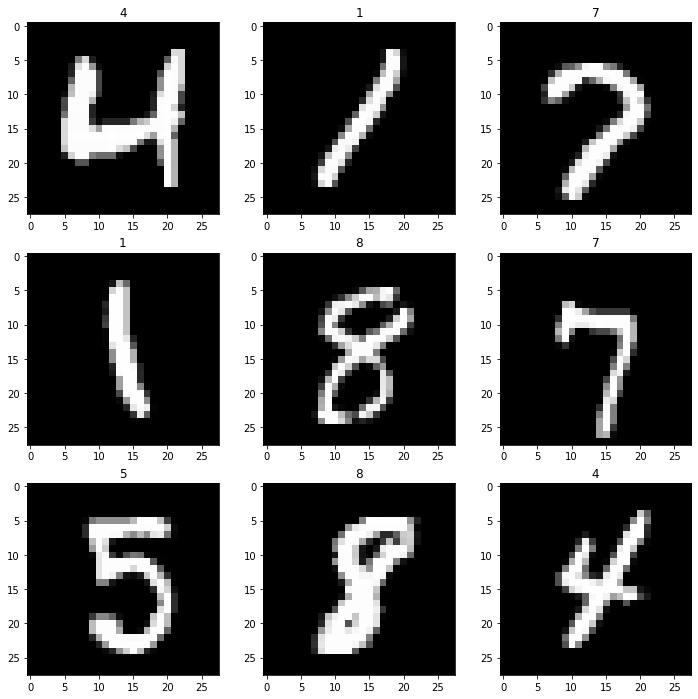

In [7]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

In [8]:
X_train.shape

(60000, 28, 28)

# Data Preprocessing

In [9]:
# Type Conversion of Columns
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

# Adding the channel
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the Model

In [11]:
# STEP-1 Define the Model

model = None
model = Sequential()

# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_normal'))

# conv3-64
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))

# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# FC-128
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))

# FC-10
model.add(Dense(10, activation='softmax'))


# STEP-2 Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# STEP-3 Fit the Model
model.fit(X_train, Y_train, batch_size=128, epochs=10)


Epoch 1/10
469/469 [==============================] - 23s 21ms/step - loss: 0.2764 - accuracy: 0.9187
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1049 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0772 - accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0634 - accuracy: 0.9803
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0536 - accuracy: 0.9833
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0485 - accuracy: 0.9853
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0399 - accuracy: 0.9878
Epoch 8/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0374 - accuracy: 0.9878
Epoch 9/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0358 - accuracy: 0.9884
Epoch 10/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0303 - accu

In [12]:
prediction_score = model.evaluate(X_test, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.03112410008907318, 0.9905999898910522]


In [13]:
from keras.preprocessing import image

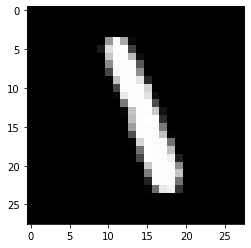

In [14]:
plt.imshow(image.array_to_img(X_test[46]), cmap="gray")

In [15]:
y_test[46]

1

In [16]:
#####################################################################################

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


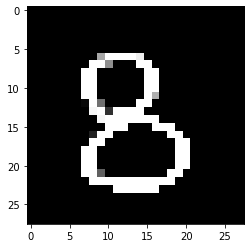

In [20]:
img = image.load_img(path="/content/8.PNG", grayscale=True, target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))

# Prediction code for tensorflow version >= 2.6 (latest 2.6.0)
image_class = model.predict(test_img) 
prediction = np.argmax(image_class, axis=1)

# Prediction code for tensorflow version < 2.6
# img_class = model.predict_classes(test_img)
# prediction = img_class[0]

In [ ]:
prediction

array([8])